In [326]:
import numpy, math
import scipy.misc
import scipy.fftpack as fftim
from scipy.misc.pilutil import Image
import math
import sys
import math
import cv2
import numpy as np
import matplotlib.pyplot as plt
#configuracion necesaria de pyplot para ver las imagenes en escala de grises
plt.rcParams['image.cmap'] = 'gray'


In [349]:

a = Image.open('Imagenes_Pruebas/ima_medica.tif').convert('L')
#configuracion necesaria de pyplot para ver las imagenes en escala de grises
# comando de Jupyter para que las imagenes se muestren automaticamente 
%matplotlib inline
#Se convierte la imagen en un array
b = numpy.asarray(a)
#fft
c = np.fft.fft2(b)
#centrar fft
d= np.fft.fftshift(c)
#d = 20*np.log(1+np.abs(d))




In [350]:
M=d.shape[0]
N=d.shape[1]
H=numpy.ones((M,N))
center1=M/2
center2=N/2
d_0=100.0
t1=1
t2=2*t1
for i in range(1,M):
    for j in range (1,N):
        r1= (i-center1)**2+(j-center2)**2
        r=math.sqrt(r1)
        if  0<r<d_0:
            H[i,j]=1/(1+(r/d_0)**t2)             
img = Image.fromarray(H)


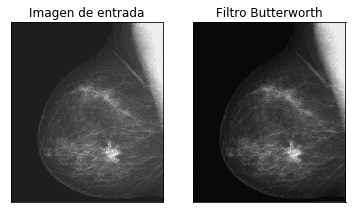

In [351]:
con=d*img
e=abs(fftim.ifft2(con))

plt.subplot(121),plt.imshow(a, cmap = 'gray')
plt.title('Imagen de entrada'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(e)
plt.title('Filtro Butterworth'), plt.xticks([]), plt.yticks([])
plt.show()


Informacion extraida de: 
    https://books.google.com.mx/books?id=nAMZCwAAQBAJ&pg=PA123&lpg=PA123&dq=butterworth+python+image&source=bl&ots=2-K5wDl_ww&sig=fmcOjNCc_U7fXai_rGj02JoCGFE&hl=es-419&sa=X&ved=2ahUKEwj4qoOv89rfAhVH7YMKHYwpDGg4ChDoATAGegQIAxAB#v=onepage&q=butterworth%20python%20image&f=false